link data set :   https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

# Nama : Fahrul Firmansyah <br>
# Grup : M02 <br>

# Data Loading

In [ ]:
!wget --no-check-certificate \
 https://github.com/aldebarankwsuperrr/system_recomendation/blob/main/books_data.zip?raw=true \
  -O /content/books_dataset.zip

--2022-09-27 15:27:46--  https://github.com/aldebarankwsuperrr/system_recomendation/blob/main/books_data.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aldebarankwsuperrr/system_recomendation/raw/main/books_data.zip [following]
--2022-09-27 15:27:46--  https://github.com/aldebarankwsuperrr/system_recomendation/raw/main/books_data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aldebarankwsuperrr/system_recomendation/main/books_data.zip [following]
--2022-09-27 15:27:46--  https://raw.githubusercontent.com/aldebarankwsuperrr/system_recomendation/main/books_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.

In [ ]:
!unzip /content/books_dataset.zip -d /content

Archive:  /content/books_dataset.zip
  inflating: /content/Books.csv      
  inflating: /content/Ratings.csv    
  inflating: /content/Users.csv      


In [ ]:
import pandas as pd
import numpy as np

books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Understanding

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
print ("Banyak Buku : ", len(books.ISBN.unique()))

Banyak Buku :  271360


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
print ("Banyak User : ", len(users['User-ID']))

Banyak User :  278858


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
print("Jumlah Rating : ", len(ratings))

Jumlah Rating :  1149780


# Univariate Exploratory Data Analysis

- User <br>
Berisi pengguna. Perhatikan bahwa ID pengguna (User-ID) telah dianonimkan dan dipetakan ke bilangan bulat. Data demografis disediakan (Lokasi, Usia) jika tersedia. Jika tidak, bidang ini berisi nilai NULL.
- Books <br>
Buku diidentifikasi dengan ISBN masing-masing. ISBN yang tidak valid telah dihapus dari set data. Selain itu, beberapa informasi berbasis konten diberikan (Judul Buku, Penulis Buku, Tahun Penerbitan, Penerbit), diperoleh dari Amazon Web Services. Perhatikan bahwa dalam kasus beberapa penulis, hanya yang pertama disediakan. URL yang tertaut ke gambar sampul juga diberikan, muncul dalam tiga rasa berbeda (Image-URL-S, Image-URL-M, Image-URL-L), yaitu kecil, sedang, besar. URL ini mengarah ke situs web Amazon.
- Ratings <br>
Berisi informasi peringkat buku. Rating (Book-Rating) bersifat eksplisit, dinyatakan dalam skala 1-10 (nilai yang lebih tinggi menunjukkan apresiasi yang lebih tinggi), atau implisit, yang dinyatakan dengan 0.

In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Melihat perbandingan antara data eksplisii dan implisit

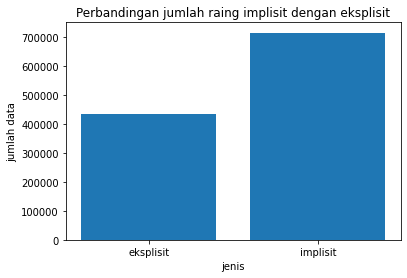

jumlah data eksplisit : 433671
jumlah data implisitt : 716109


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

jenis = ['eksplisit', 'implisit']
eksplisit = len(ratings[ratings['Book-Rating'] != 0])
implisit = len(ratings[ratings['Book-Rating'] == 0])
jumlah_data = [eksplisit, implisit]

plt.bar(jenis, jumlah_data)
plt.title("Perbandingan jumlah raing implisit dengan eksplisit")
plt.xlabel("jenis")
plt.ylabel("jumlah data")
plt.show()
print ("jumlah data eksplisit :" , eksplisit)
print ("jumlah data implisitt :" , implisit)

In [ ]:
len(ratings[ratings['Book-Rating'] != 0] )

433671

# Data Preparation

mengambil data eksplisit dari dataset ratings

In [ ]:
new_rating = ratings[ratings['Book-Rating'] != 0]

Menghapus kolom yang tidak diperlukan <br>
Melakukan penggabungan dataset buku dengan dataset rating eksplisit <br>
Menghilangkan duplikat buku berdasarkan ISBN

In [ ]:
books = books.drop(columns=['Image-URL-S', 'Image-URL-M','Image-URL-L'])
new_books = pd.merge (books, new_rating, on='ISBN', how='left')
new_books = new_books.drop_duplicates('ISBN')
new_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
10,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,2954.0,8.0
12,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,35704.0,6.0
18,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,NaN,NaN
...,...,...,...,...,...,...,...
505361,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463.0,7.0
505362,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,276579.0,4.0
505363,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,NaN,NaN
505364,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,NaN,NaN


Memeriksa missing value

In [ ]:
new_books.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
User-ID                121524
Book-Rating            121524
dtype: int64

Menghilangkan missing value

In [ ]:
new_books = new_books.dropna()
new_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Book-Rating            0
dtype: int64

Melihat penerbit teratas

In [ ]:
buku_teratas = new_books['Publisher'].value_counts().head(15)

buku_teratas

Harlequin                   3007
Ballantine Books            2327
Pocket                      2277
Penguin Books               1948
Bantam Books                1944
Berkley Publishing Group    1759
Silhouette                  1687
Warner Books                1672
Scholastic                  1589
Simon &amp; Schuster        1582
Signet Book                 1332
Penguin USA                 1318
Harpercollins               1303
Bantam                      1219
Avon                        1186
Name: Publisher, dtype: int64

Mengambil data-data buku dengan penerbit teratas

In [ ]:
buku_harlequin = new_books[new_books['Publisher'] == 'Harlequin']
buku_harlequin = buku_harlequin.reset_index()
buku_harlequin

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,7568,0373836023,Powder and Patch,Georgette Heyer,2004,Harlequin,254.0,7.0
1,21057,0373037430,Rush to the Altar (Twin Brides),Rebecca Winters,2003,Harlequin,182085.0,9.0
2,21074,0373750013,The Virgin's Secret Marriage The Brides Of H...,Cathy Gillen Thacker,2003,Harlequin,40330.0,10.0
3,21329,0373123485,On The Tycoon's Terms Do Not Disturb! (Harle...,Sandra Field,2003,Harlequin,74493.0,7.0
4,21330,0373123108,Sleeping Partners (Nine to Five),Helen Brooks,2003,Harlequin,164905.0,10.0
...,...,...,...,...,...,...,...,...
3002,503534,0373109830,"Standing On The Outs (Harlequin Presents, No 983)",Lindsay Armstrong,1987,Harlequin,242006.0,7.0
3003,503537,0373111215,"Heart Of The Hawk (Harlequin Presents, No 1121)",Sandra Marton,1988,Harlequin,242006.0,8.0
3004,503538,0373113757,"Pulse Of The Heartland (Harlequin Presents, No...",Melinda Cross,1991,Harlequin,242006.0,7.0
3005,503539,0373113854,"Colour Of Desire (Harlequin Presents, No 1385)",Emma Darcy,1991,Harlequin,242006.0,8.0


# Content Based Filtering

In [ ]:
data = buku_harlequin
data.sample(5)

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
532,204638,0373223722,Tender Hours (Women Of Mystery) (Harlequin Int...,Paige Phillips,1996,Harlequin,20022.0,5.0
2885,468344,0373292910,"Colorado Courtship (Harlequin Historical, No. ...",Carolyn Davidson,2004,Harlequin,148966.0,5.0
217,148027,0373168683,Montana Mail - Order Wife (Identity Swap) (Har...,Charlotte Douglas,2001,Harlequin,119773.0,6.0
2681,422478,0373032919,"Home For Christmas (Harlequin Romance, No 3291)",Ellen James,1993,Harlequin,229632.0,5.0
413,193076,0373832826,Tomorrow'S Promise,Kenneth T. Brown,1993,Harlequin,81597.0,7.0


Melakukan perhitungan idf pada data cuisine dan  Mapping array dari fitur index integer ke fitur nama

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
 
tf.fit(data['Book-Author']) 
 
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abbot',
 'abra',
 'ada',
 'adair',
 'adams',
 'adrianne',
 'aimee',
 'alessandro',
 'alex',
 'alexander',
 'alexandra',
 'alice',
 'alison',
 'allan',
 'allen',
 'allison',
 'allyne',
 'altom',
 'alyssa',
 'amanda',
 'amarillas',
 'ames',
 'amii',
 'ana',
 'anders',
 'andersen',
 'anderson',
 'andrew',
 'andrews',
 'angela',
 'anita',
 'ann',
 'anna',
 'anne',
 'annette',
 'anton',
 'archer',
 'arden',
 'arlene',
 'armstrong',
 'arnette',
 'arnold',
 'arthur',
 'ash',
 'ashley',
 'ashtree',
 'atkins',
 'austin',
 'author',
 'avery',
 'badger',
 'baird',
 'baire',
 'balogh',
 'banning',
 'barbara',
 'barclay',
 'barnes',
 'barrett',
 'bauer',
 'bauling',
 'bauman',
 'baxter',
 'bay',
 'bcbride',
 'beaumont',
 'benjamin',
 'bennett',
 'bernard',
 'bethany',
 'bettany',
 'betty',
 'bev',
 'beverley',
 'beverly',
 'bianchin',
 'bingham',
 'binnie',
 'bishop',
 'blake',
 'blythe',
 'bobby',
 'bockoven',
 'bolen',
 'bond',
 'bonnie',
 'books',
 'boswell',
 'bowen',
 'brandewyne',
 'brashea

Memasukkan data penulis buku ke model

In [ ]:
tfidf_matrix = tf.fit_transform(data['Book-Author']) 
 
tfidf_matrix.shape 

(3007, 943)

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Melihat hubungan antara buku dengan fitur-fitur penting

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data['Book-Author']
).sample(649, axis=1).sample(5, axis=0)

,london,marie,taylor,geoff,gracie,bobby,gloria,daly,allyne,thorne,...,bridges,daphne,cooper,mckenna,hale,kelly,andrew,cherry,bockoven,austin
Book-Author,,,,,,,,,,,,,,,,,,,,,
Vicki Lewis Thompson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Debbie Macomber,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mary Jo Putney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jo Leigh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Julie Kenner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menggunakan cosine similarity untuk mencari korelasi

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku dan Melihat similarity matrix pada setiap buku

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Book-Title'], columns=data['Book-Title'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(10, axis=1).sample(7, axis=0)

Shape: (3007, 3007)


Book-Title,"Honeymoon (Superromance , No 799)","Baby And The Badge (Patton'S Daughters) (Harlequin Superromance, No. 860)","Her Secret Santa (Simply The Best) (Harlequin Romance, No 3486)",Kissed By The Sea (More Than Men),"Ideal Marriage (Top Author) (Harlequin Presents, No 1905)","Exclusively Yours (Harlequin Presents, No 1162)","Night And Day (Harlequin Intrigue, No. 637)","Coming Home To You (Harlequin Super Romance, No 961)","Guilty Wife (Harlequin Presents, No 1902)","Just Desserts / Green Eggs and Sam (Duets, 80)"
Book-Title,,,,,,,,,,
"To Save His Baby (A Memory Away...) (Harlequin Intrigue, No. 531)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Jordan (The Buckhorn Brothers) (Temptation, 798)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drive The Night Away,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inadmissible Passion (Harlequin Intrigue #579),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Fiance Fix (Tango),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Undercover Christmas (Hidden Identity) (Harlequi Intrigue, No 446)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Passages Of Gold (American Romance, No 288)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Membuat fungsi untuk menampilkan rekomendasi dari teknik content based filtering

In [ ]:
def resto_recommendations(book_title, similarity_data=cosine_sim_df, items=data[['Book-Title', 'Book-Author']], k=5):
   
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(book_title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data[data['Book-Title'].eq('Major Comes To Texas (In Uniform) (Superromance, 915)')]

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
1407,281069,0373709153,Major Comes To Texas (In Uniform) (Superromanc...,K. N. Casper,2000,Harlequin,227072.0,7.0


Melakukan pemanggilan fungsi rekomendasi

In [ ]:
resto_recommendations('Major Comes To Texas (In Uniform) (Superromance, 915)')

,Book-Title,Book-Author
0,Jackson's Girls (Raising Cane),K.N. Casper
1,First Daughter (The First Family Of Texas) (Ha...,K. N. Casper
2,Texan (Home On The Ranch) (Harlequin Superroma...,K. N. Casper
3,Mother To His Children (The First Family Of Te...,K.N. Casper
4,The Woman In The News Beyond 9 To 5 (Harlequ...,K.N. Casper


# Colaborative Filtering

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Melakukan data preparation dengan mengambil data-data buku dengan fitur User-id, ISBN, dan Book-Rating

In [ ]:
df = buku_harlequin[['User-ID', 'ISBN','Book-Rating']]
df

,User-ID,ISBN,Book-Rating
0,254.0,0373836023,7.0
1,182085.0,0373037430,9.0
2,40330.0,0373750013,10.0
3,74493.0,0373123485,7.0
4,164905.0,0373123108,10.0
...,...,...,...
3002,242006.0,0373109830,7.0
3003,242006.0,0373111215,8.0
3004,242006.0,0373113757,7.0
3005,242006.0,0373113854,8.0


Melakukan encoding untuk fitur user

In [ ]:

user_ids = df['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User-ID: ', user_encoded_to_user)

list User-ID:  [254.0, 182085.0, 40330.0, 74493.0, 164905.0, 900.0, 98391.0, 16908.0, 38781.0, 252347.0, 1161.0, 1167.0, 1192.0, 28451.0, 1733.0, 246655.0, 25976.0, 168438.0, 162200.0, 244662.0, 2046.0, 25916.0, 200238.0, 143683.0, 267282.0, 127384.0, 2656.0, 194637.0, 3840.0, 51883.0, 4118.0, 4148.0, 3363.0, 4385.0, 160401.0, 208019.0, 5430.0, 5674.0, 233652.0, 5815.0, 6007.0, 6029.0, 93711.0, 6338.0, 6431.0, 242006.0, 67775.0, 11676.0, 27169.0, 45122.0, 142772.0, 88677.0, 217212.0, 6505.0, 97198.0, 45218.0, 7060.0, 278188.0, 7125.0, 7418.0, 229551.0, 148966.0, 31342.0, 89307.0, 14573.0, 7916.0, 8019.0, 8201.0, 8284.0, 8323.0, 8872.0, 9289.0, 174326.0, 9313.0, 31099.0, 9701.0, 9709.0, 138844.0, 163759.0, 32182.0, 23872.0, 117719.0, 151237.0, 10532.0, 11355.0, 11405.0, 108285.0, 37208.0, 278418.0, 19681.0, 17282.0, 28591.0, 12515.0, 177690.0, 39372.0, 159033.0, 27462.0, 13747.0, 30276.0, 152514.0, 140358.0, 235935.0, 38029.0, 36135.0, 125774.0, 64075.0, 264082.0, 116599.0, 264321.0, 53

melakukan encoding untuk fitur buku

In [ ]:

book_ids = df['ISBN'].unique().tolist()
 
# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
 
# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

Melakukan mapping pada fitur user dan buku yang sudah di encoding

In [ ]:
df['user'] = df['User-ID'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
df['book'] = df['ISBN'].map(book_to_book_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah book
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['Book-Rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))


701
3007
Number of User: 701, Number of book: 3007, Min Rating: 1.0, Max Rating: 10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book,rating
744,26535.0,0373120079,7.0,136,744,7.0
678,25981.0,0373224168,5.0,142,678,5.0
2290,205784.0,0373106637,6.0,599,2290,6.0
2488,114413.0,0373259166,8.0,630,2488,8.0
942,30276.0,0373252196,7.0,98,942,7.0
...,...,...,...,...,...,...
1638,268540.0,0373711964,10.0,504,1638,10.0
1095,229551.0,0373121024,2.0,60,1095,2.0
1130,93513.0,037310748X,7.0,362,1130,7.0
1294,114368.0,0373791070,5.0,163,1294,5.0


Membagi dataset menjadi training data dan testing data dengan skala 80 : 20

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 136  744]
 [ 142  678]
 [ 599 2290]
 ...
 [ 362 1130]
 [ 163 1294]
 [ 297  860]] [0.66666667 0.44444444 0.55555556 ... 0.66666667 0.44444444 0.88888889]


Membuat model rekomendasi dengan membuat class turunan dari tf.keras.model

In [ ]:


class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

melakukan inisialisasi model dan melakukan compile model

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Melatih model dengan jumlah epoch 100

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
301/301 [==============================] - 7s 13ms/step - loss: 0.6851 - root_mean_squared_error: 0.2843 - val_loss: 0.6795 - val_root_mean_squared_error: 0.2785
Epoch 2/100
301/301 [==============================] - 3s 11ms/step - loss: 0.6340 - root_mean_squared_error: 0.2359 - val_loss: 0.6699 - val_root_mean_squared_error: 0.2698
Epoch 3/100
301/301 [==============================] - 3s 10ms/step - loss: 0.5985 - root_mean_squared_error: 0.2000 - val_loss: 0.6655 - val_root_mean_squared_error: 0.2658
Epoch 4/100
301/301 [==============================] - 3s 11ms/step - loss: 0.5901 - root_mean_squared_error: 0.1908 - val_loss: 0.6614 - val_root_mean_squared_error: 0.2619
Epoch 5/100
301/301 [==============================] - 3s 11ms/step - loss: 0.5830 - root_mean_squared_error: 0.1831 - val_loss: 0.6575 - val_root_mean_squared_error: 0.2584
Epoch 6/100
301/301 [==============================] - 3s 9ms/step - loss: 0.5761 - root_mean_squared_error: 0.1749 - val_loss: 0.

Melakukan visualisasi dari latihan model

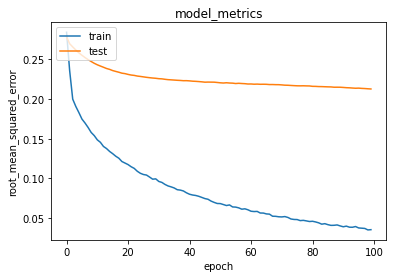

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

melakukan uji coba model dan mulai membuat rekomendasi dengan mengambil salah satu sampel user dan menandai buku yang telah dibaca.

In [ ]:
df = buku_harlequin[['User-ID', 'ISBN', 'Book-Rating']]
buku_df = buku_harlequin[['ISBN', 'Book-Title', 'Book-Author']]
# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
buku_visited_by_user = df[df['User-ID'] == user_id]
print(buku_visited_by_user)
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
buku_not_visited = buku_df[~buku_df.ISBN.isin(buku_visited_by_user.ISBN.values)]['ISBN'] 
buku_not_visited = list(
    set(buku_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)
 
buku_not_visited = [[book_to_book_encoded.get(x)] for x in buku_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_buku_array = np.hstack(
    ([[user_encoder]] * len(buku_not_visited), buku_not_visited)
)

      User-ID        ISBN  Book-Rating
74    11676.0  037370870X          8.0
101   11676.0  037322771X          9.0
103   11676.0  0373712006         10.0
129   11676.0  0373289138          6.0
177   11676.0  0373118333          4.0
...       ...         ...          ...
2792  11676.0  0373834969          6.0
2873  11676.0  0373029853          5.0
2886  11676.0  0373160844          9.0
2937  11676.0  0373253745          2.0
2938  11676.0  037344169X          6.0

[78 rows x 3 columns]


memberikan rekomendasi untuk user 

In [ ]:
ratings = model.predict(user_buku_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(buku_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    buku_visited_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5).ISBN.values
)
 
book_df_rows = buku_df[buku_df['ISBN'].isin(top_book_user)]

print(book_df_rows[['Book-Title', 'Book-Author']])
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = buku_df[buku_df['ISBN'].isin(recommended_book_ids)]
print(recommended_book[['Book-Title','Book-Author']])

Showing recommendations for users: 11676.0
book with high ratings from user
--------------------------------
                                             Book-Title           Book-Author
1010  Midnight Fantasies: Mystery Lover/After Hours/...  Vicki Lewis Thompson
1813                               Notorious (Blaze, 1)        Vicki Thompson
1853        Left In Trust (Harlequin Presents, No 1571)            Kay Thorpe
2565            Bad Penny (Harlequin Romance, No. 3268)             Susan Fox
2693  Baby Discovery (Bachelor Dads) (Harlequin Roma...       Rebecca Winters
--------------------------------
Top 10 book recommendation
--------------------------------
                                             Book-Title           Book-Author
39               A Snowball's Chance/ A Christmas Carol          Nikki Rivers
86                 Long Tall Texans: Emmett-Regan-Burke          Diana Palmer
891    Sawyer (The Buckhorn Brothers) (Temptation, 786)           Lori Foster
905      For The D